# Question 1: CNN using Tensorflow

1. Load the cifar 100 dataset. Use the 'coarse' labels.
https://www.tensorflow.org/api_docs/python/tf/keras/datasets/cifar100/load_data



In [2]:
import tensorflow as tf
tf.keras.datasets.cifar100.load_data(
    label_mode='coarse'
)
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar100.load_data()
assert x_train.shape == (50000, 32, 32, 3)
assert x_test.shape == (10000, 32, 32, 3)
assert y_train.shape == (50000, 1)
assert y_test.shape == (10000, 1)

169001437/169001437 [==============================] - 4s 0us/step


2. Check if there are 20 labels in y_train using np.unique().

In [3]:
import numpy as np
labels=np.unique(y_train)
print(len(labels))

100


3. More information about the dataset could be found here : https://www.cs.toronto.edu/~kriz/cifar.html . Plot the first 25 images from both the train and test data.

class_names = ["aquatic mammals","fish","flowers","food containers","fruit and vegetables","household electrical devices",
"household furniture","insects","large carnivores","large man-made outdoor things","large natural outdoor scenes","large omnivores and herbivores","medium-sized mammals","non-insect invertebrates","people","reptiles","small mammals","trees","vehicles 1","vehicles 2"]

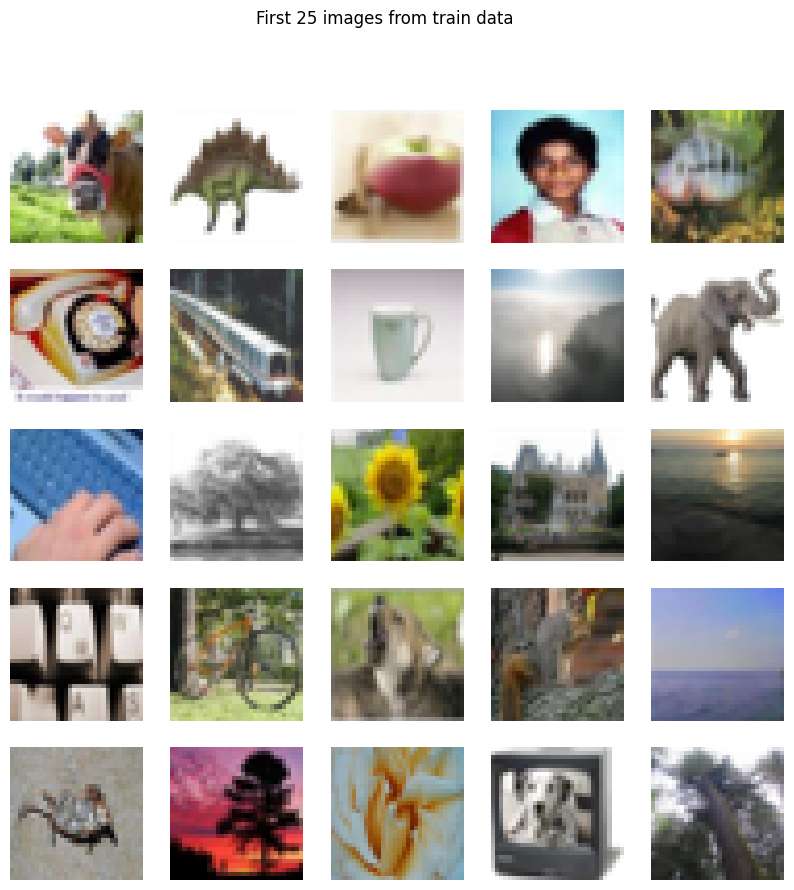

In [6]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5, 5, i + 1)
  plt.imshow(x_train[i])
  plt.xlabel(y_train[i][0])
  plt.axis('off')

plt.suptitle("First 25 images from train data")
plt.show()






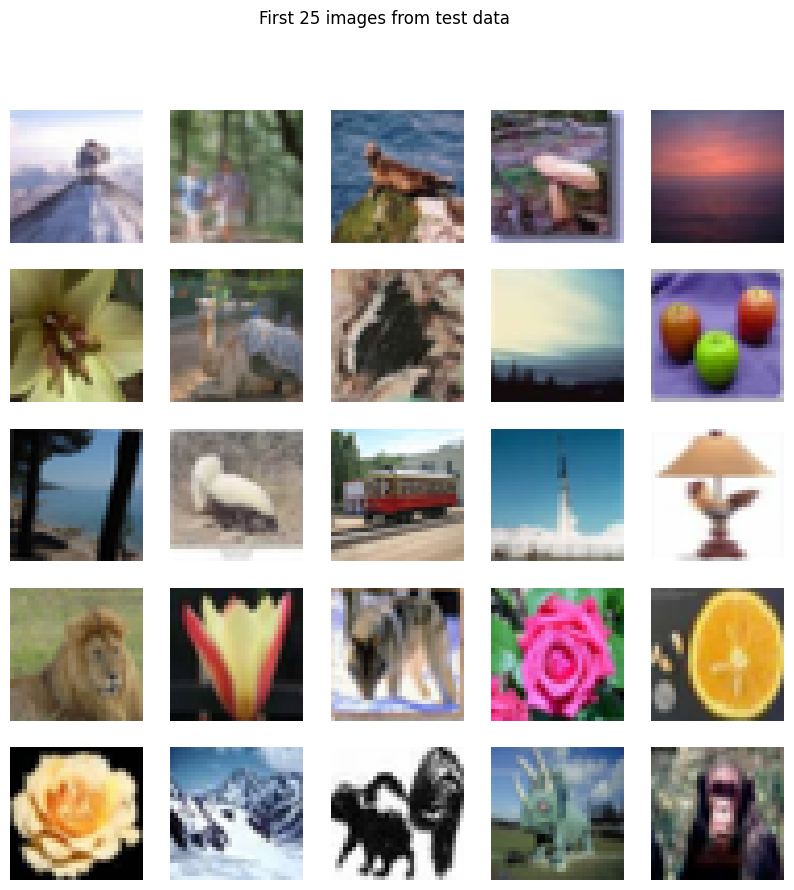

In [7]:
plt.figure(figsize=(10, 10))
for i in range(25):
  plt.subplot(5, 5, i + 1)
  plt.imshow(x_test[i])
  plt.xlabel(y_test[i][0])
  plt.axis('off')

plt.suptitle("First 25 images from test data")
plt.show()

Import layers and models from tensorflow.keras and build a Sequential Model with Convulation layers at the base and Fully Connected Layers at the top.

We used the same model in the Example Notebook for MNIST and achieved only 41% accuracy on the test data.

We then used the following architecture to achieve 45% accuracy on the test data:

1. Conv Layer : 32 filters each of 3x3.
2. Conv Layer : 64 filters each of 3x3.
3. Max pool layer of 2x2 kernel size.
4. Conv Layer : 64 filters each of 2x2.
5. Conv Layer : 64 filters each of 2x2.
6. Max pool layer of 2x2 kernel size.
7. Flatten.
8. Dense of 80 neurons.
9. Dense of 50 neurons.
10. Dense of 20 neurons.

To train this, it required 40 minutes.

You should come up with your own architecture.

In [ ]:

from tensorflow.keras import layers, models
from tensorflow.keras.utils import to_categorical
y_train = tf.keras.utils.to_categorical(y_train, num_classes=100)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=100)
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0





In [ ]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(100, activation='softmax')
])


model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(x_train, y_train, epochs=20, batch_size=64, validation_data=(x_test, y_test))

Epoch 1/20
782/782 [==============================] - 76s 95ms/step - loss: 4.0481 - accuracy: 0.0838 - val_loss: 3.6228 - val_accuracy: 0.1458
Epoch 2/20
782/782 [==============================] - 68s 87ms/step - loss: 3.4475 - accuracy: 0.1778 - val_loss: 3.3058 - val_accuracy: 0.2002
Epoch 3/20
782/782 [==============================] - 66s 85ms/step - loss: 3.1479 - accuracy: 0.2298 - val_loss: 3.0764 - val_accuracy: 0.2507
Epoch 4/20
782/782 [==============================] - 79s 101ms/step - loss: 2.9544 - accuracy: 0.2669 - val_loss: 2.9287 - val_accuracy: 0.2709
Epoch 5/20
782/782 [==============================] - 74s 94ms/step - loss: 2.8050 - accuracy: 0.2977 - val_loss: 2.8330 - val_accuracy: 0.2911
Epoch 6/20
782/782 [==============================] - 67s 86ms/step - loss: 2.6853 - accuracy: 0.3212 - val_loss: 2.7756 - val_accuracy: 0.3017
Epoch 7/20
782/782 [==============================] - 66s 85ms/step - loss: 2.5894 - accuracy: 0.3404 - val_loss: 2.6588 - val_accuracy

Plot the training accuracy vs number of epochs graph. Print the test accuracy.

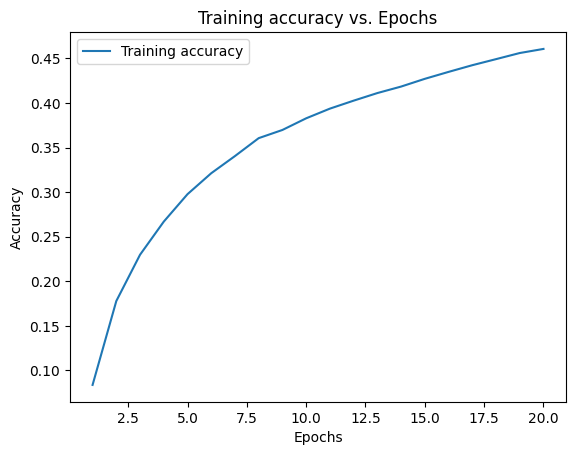

In [ ]:

accuracy = history.history['accuracy']
epochs = range(1, len(accuracy) + 1)

plt.plot(epochs, accuracy, label='Training accuracy')
plt.title('Training accuracy vs. Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


Check this website : https://paperswithcode.com/sota/image-classification-on-cifar-100 . It contains information about the best performing models. The top models are of transformers. We can check the ResNet-18 model. It consists of 18 layers. The architecture could be in the internet. Use ChatGPT if necessary. Training it for 10 epochs will take approximately 1 hour.

The layers are :

1. Conv layer : 64 kernels, 7x7 . strides = (2,2). activation =none.
2. Batch Normalization.
3. Relu Activation.
4. MaxPooling 3x3 . stride =2x2.
5. Conv layer : 64 kernels, 3x3 . strides = (1,1). activation =none.
6. Batch Normalization.
7. Relu Activation.
8. Same as 5 but 128 kernels.
9. Batch Normalization.
10. Relu Activation.
11. Same as 5 but 256 kernels.
12. Batch Normalization.
13. Relu Activation.
14. Same as 5 but 512 kernels.
15. Batch Normalization.
16. Relu Activation.
17. Global Average Pooling.
18. Dense layer of 20 neurons.





In [ ]:


# Define your CNN architecture
model = models.Sequential()

# Conv layer 1
model.add(layers.Conv2D(64, (7, 7), strides=(2, 2), padding='same', activation=None, input_shape=(32,32,3)))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu'))
model.add(layers.MaxPooling2D((3, 3), strides=(2, 2)))

# Conv layer 2
model.add(layers.Conv2D(64, (3, 3), strides=(1, 1), padding='same', activation=None))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu'))

# Conv layer 3 (64 kernels)
model.add(layers.Conv2D(64, (3, 3), strides=(1, 1), padding='same', activation=None))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu'))

# Conv layer 4 (128 kernels)
model.add(layers.Conv2D(128, (3, 3), strides=(1, 1), padding='same', activation=None))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu'))

# Conv layer 5 (256 kernels)
model.add(layers.Conv2D(256, (3, 3), strides=(1, 1), padding='same', activation=None))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu'))

# Conv layer 6 (512 kernels)
model.add(layers.Conv2D(512, (3, 3), strides=(1, 1), padding='same', activation=None))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu'))

# Global Average Pooling
model.add(layers.GlobalAveragePooling2D())

# Dense layer
model.add(layers.Dense(100, activation='softmax'))

# Compile your model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train,y_train, epochs=10, batch_size=64, validation_data=(x_test,y_test))




Epoch 1/10
782/782 [==============================] - 707s 895ms/step - loss: 3.4182 - accuracy: 0.1789 - val_loss: 3.5749 - val_accuracy: 0.1713
Epoch 2/10
782/782 [==============================] - 752s 961ms/step - loss: 2.7471 - accuracy: 0.2988 - val_loss: 2.9422 - val_accuracy: 0.2679
Epoch 3/10
 21/782 [..............................] - ETA: 10:11 - loss: 2.4665 - accuracy: 0.3490

KeyboardInterrupt: 

# Question 2: Rising Fuel Prices
In a regression problem, the aim is to predict the output of a continuous value, like a price or a probability.

In this question, we will be using the classic Auto MPG dataset and build a model to predict the fuel efficiency of the late-1970s and early 1980s automobiles. To do this, we will provide the models with a description of many automobiles from that time period. This description includes attributes like cylinders, displacement, horsepower, and weight.

In [8]:
import tensorflow as tf
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

Load the data.

In [9]:
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data'
column_names = ['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight', 'Acceleration', 'Model Year', 'Origin', 'Car Name']
dataset = pd.read_csv(url, names=column_names, na_values='?', comment='\t', sep=' ', skipinitialspace=True)
dataset.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin,Car Name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,NaN
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,NaN
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,NaN
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,NaN
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,NaN


Get an overview of the data.

In [10]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MPG           398 non-null    float64
 1   Cylinders     398 non-null    int64  
 2   Displacement  398 non-null    float64
 3   Horsepower    392 non-null    float64
 4   Weight        398 non-null    float64
 5   Acceleration  398 non-null    float64
 6   Model Year    398 non-null    int64  
 7   Origin        398 non-null    int64  
 8   Car Name      0 non-null      float64
dtypes: float64(6), int64(3)
memory usage: 28.1 KB


Drop the null values and redundant columns. Or you may do imputation of null values, if you are familiar with that.

Search for dropping rows with null values in a Pandas dataframe.

In [11]:
df=dataset.copy()
df.drop(['Car Name'],axis=1,inplace=True)
new_df = df.dropna(subset=['Origin'])
new_df.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1


##Handling Non-Numeric Data
The origin column contains "Label Encoded Values". More about it [here](https://www.geeksforgeeks.org/ml-label-encoding-of-datasets-in-python/).

We want to convert it into a [One-Hot-Encoded](https://www.geeksforgeeks.org/ml-one-hot-encoding-of-datasets-in-python//) value.

In [12]:
# Convert categorical 'Origin' column to one-hot encoded features : pd.get_dummies ...
new_df=pd.get_dummies(new_df,columns=['Origin'])
new_df.head()


,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin_1,Origin_2,Origin_3
0,18.0,8,307.0,130.0,3504.0,12.0,70,True,False,False
1,15.0,8,350.0,165.0,3693.0,11.5,70,True,False,False
2,18.0,8,318.0,150.0,3436.0,11.0,70,True,False,False
3,16.0,8,304.0,150.0,3433.0,12.0,70,True,False,False
4,17.0,8,302.0,140.0,3449.0,10.5,70,True,False,False


In [30]:
# Separate the target variable from the features in the dataset.
X = new_df.drop('MPG', axis=1)
y = new_df['MPG']
new_df.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin_1,Origin_2,Origin_3
0,18.0,8,307.0,130.0,3504.0,12.0,70,True,False,False
1,15.0,8,350.0,165.0,3693.0,11.5,70,True,False,False
2,18.0,8,318.0,150.0,3436.0,11.0,70,True,False,False
3,16.0,8,304.0,150.0,3433.0,12.0,70,True,False,False
4,17.0,8,302.0,140.0,3449.0,10.5,70,True,False,False


In [31]:
# Split the data into training and testing sets. Use sklearn.model_selection.train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Scaling the Data
It is evident that the features vary a lot by a quick statistical survey. To ensure that our model generalizes over a large variety of vehicles, we need to Normalize the data using the *scaler.fit_transform*.

In [33]:
# Scale the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
columns_to_scale = ['Cylinders', 'Displacement', 'Horsepower', 'Weight', 'Acceleration', 'Model Year']
X_train[columns_to_scale] = scaler.fit_transform(X_train[columns_to_scale])
X_test[columns_to_scale] = scaler.transform(X_test[columns_to_scale])
y_train=scaler.fit_transform(y_train.values.reshape(-1,1))
y_test=scaler.transform(y_test.values.reshape(-1,1))






# Building the Model

Build a Fully Connected Neural Network with 3-4 Dense layers. You may decide the number of neuron in each layers.

Fit the model on the train data and evaluate the predictions on test data.

Use Adam optimizer and MeanSquaredError cost function. The lower the error, the better the model. Try to get MSE < 6 on the test data.

In [34]:
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

X_train = np.array(X_train, dtype=np.float32)
X_test = np.array(X_test, dtype=np.float32)
y_train = np.array(y_train, dtype=np.float32)
y_test = np.array(y_test, dtype=np.float32)

y_train = np.nan_to_num(y_train, nan=0.0)
X_train = np.nan_to_num(X_train, nan=0.0)
X_test = np.nan_to_num(X_test, nan=0.0)
y_test = np.nan_to_num(y_test, nan=0.0)

model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))


model.compile(optimizer='adam', loss='mean_squared_error')

history = model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=1)

y_pred = model.predict(X_test)
y_pred = np.nan_to_num(y_pred, nan=0.0)

mse = mean_squared_error(y_test, y_pred)
print(mse)




Epoch 1/100
10/10 [==============================] - 1s 3ms/step - loss: 0.5665
Epoch 2/100
10/10 [==============================] - 0s 3ms/step - loss: 0.1998
Epoch 3/100
10/10 [==============================] - 0s 2ms/step - loss: 0.1677
Epoch 4/100
10/10 [==============================] - 0s 2ms/step - loss: 0.1402
Epoch 5/100
10/10 [==============================] - 0s 2ms/step - loss: 0.1231
Epoch 6/100
10/10 [==============================] - 0s 3ms/step - loss: 0.1150
Epoch 7/100
10/10 [==============================] - 0s 2ms/step - loss: 0.1079
Epoch 8/100
10/10 [==============================] - 0s 3ms/step - loss: 0.1028
Epoch 9/100
10/10 [==============================] - 0s 3ms/step - loss: 0.0978
Epoch 10/100
10/10 [==============================] - 0s 3ms/step - loss: 0.1012
Epoch 11/100
10/10 [==============================] - 0s 2ms/step - loss: 0.0924
Epoch 12/100
10/10 [==============================] - 0s 2ms/step - loss: 0.0897
Epoch 13/100
10/10 [=================

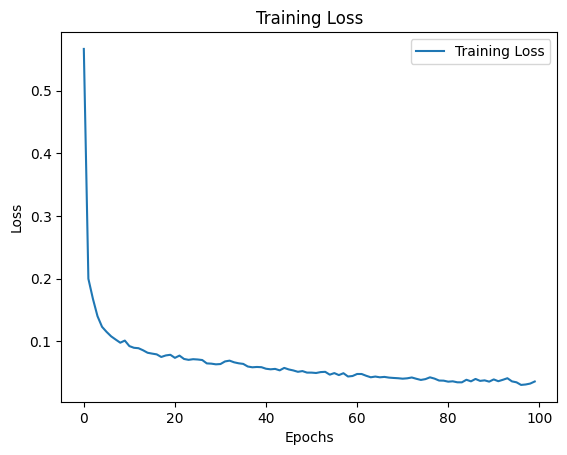

In [35]:
#Plot the Loss from the history..

plt.plot(history.history['loss'], label='Training Loss')
plt.title('Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [25]:
# Evaluate the model on the test set
loss = model.evaluate(X_test, y_test)
print(loss)


3/3 [==============================] - 0s 5ms/step - loss: 4.8586
Test Loss: 4.85862922668457
